In [72]:

import matplotlib. pyplot as plt
import matplotlib. ticker as ticker
import numpy as np
import pandas as pd
import math
from simple_kNN import *

In [74]:
from sklearn.datasets import *
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline
sns. set(style="ticks")

In [75]:
wine = load_wine()

In [76]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [77]:
np.unique(wine.target)

array([0, 1, 2])

In [78]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [79]:
list(zip(np.unique(wine.target), wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [80]:

wine.data.shape, wine.target.shape

((178, 13), (178,))

In [81]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

In [82]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [83]:

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [84]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<AxesSubplot:>

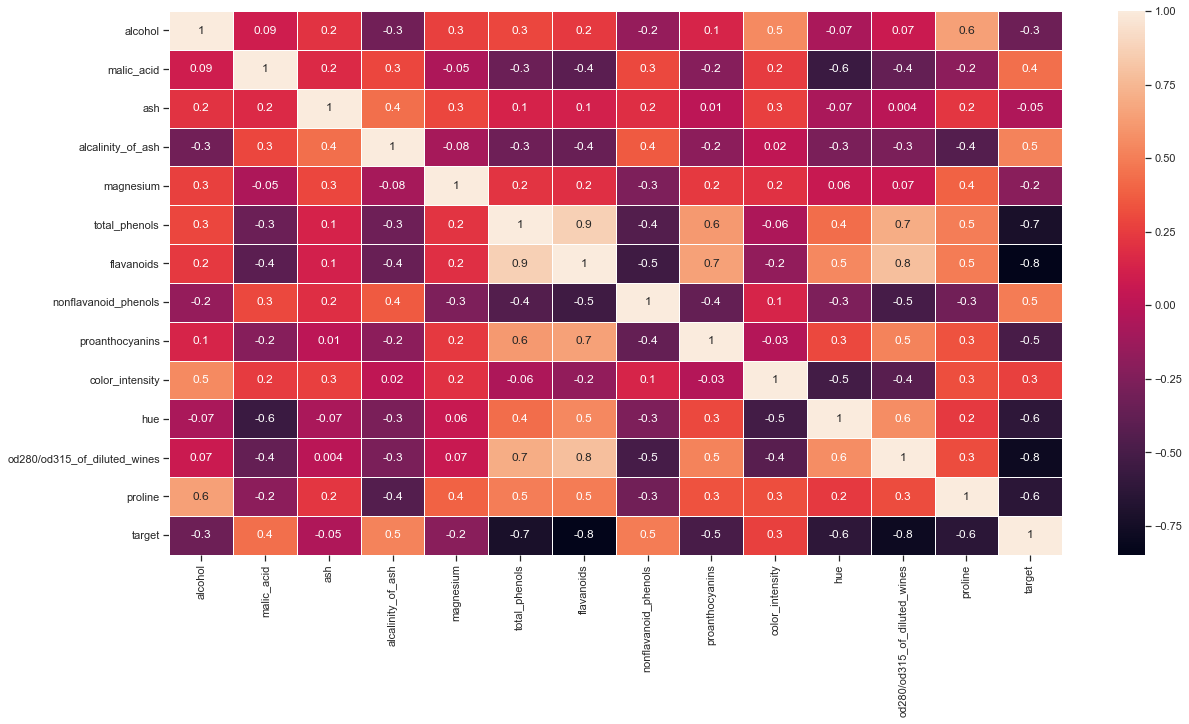

In [85]:

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(wine_df.corr(), annot = True, fmt='.1g', linewidths=.5, ax=ax)

#### Разделение выборки на тестовую и обучающую

In [86]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=1)

In [87]:
wine_X_train.shape, wine_y_train.shape

((142, 13), (142,))

In [88]:
wine_X_test.shape, wine_y_test.shape

((36, 13), (36,))

In [89]:
np.unique(wine_y_train)

array([0, 1, 2])

In [90]:
np.unique(wine_y_test)

array([0, 1, 2])

### Построение базовой модели на основе ближайших соседей

In [91]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(36,
 array([0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]))

In [92]:
# 10 ближайших соседа
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(36,
 array([2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1]))

### Метрики качества классификации

In [93]:
accuracy_score(wine_y_test, target1_1)

0.6111111111111112

In [94]:
accuracy_score(wine_y_test, target1_2)

0.6666666666666666

### Произведите подбор гиперпараметра K с использованием GridSearchCV

In [95]:
print(classification_report(wine_y_test, target1_2))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.64      0.69      0.67        13
           2       0.40      0.44      0.42         9

    accuracy                           0.67        36
   macro avg       0.65      0.64      0.64        36
weighted avg       0.69      0.67      0.68        36



In [96]:
def print_gridResults(grid):
    print(f'Подобранный параметр: {grid.best_params_}')
    print(f'Оценка при подобранном параметре: {grid.best_score_}')
    return [grid.best_params_, grid.best_score_]

In [114]:
param_grid = {'n_neighbors' : np.arange(1, 25)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(wine.data, wine.target)
print_gridResults(grid)

Подобранный параметр: {'n_neighbors': 1}
Оценка при подобранном параметре: 0.7250793650793651


[{'n_neighbors': 1}, 0.7250793650793651]

### Произведите подбор гиперпараметра K с использованием RandomizedSearchCV

In [112]:
param_grid = {'n_neighbors' : np.arange(1, 25)}
grid2 = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=2)
grid2.fit(wine.data, wine.target)
print_gridResults(grid2)

Подобранный параметр: {'n_neighbors': 6}
Оценка при подобранном параметре: 0.6914285714285714


[{'n_neighbors': 6}, 0.6914285714285714]

### Кросс валидация

In [99]:
DEFAULT_FOLDS = 3
DEFAULT_RANGES = np.arange(1, 25)

In [100]:

cv1 = cross_val_score(KNeighborsClassifier(n_neighbors=5), wine.data, wine.target, cv=DEFAULT_FOLDS, scoring='accuracy')

In [101]:
cv1

array([0.61666667, 0.61016949, 0.76271186])

In [102]:
from sklearn.model_selection import *

In [103]:
def knn_cross_strtegies(mass_strategies, mass_matrics, k_range, cv, x, y):
    k_strategies_scores = {}
    for strat in mass_strategies:
        strategia = strat(cv) # n_splits
        k_scores = knn_cross_val_score(mass_matrics, k_range, strategia, x, y)
        k_strategies_scores[strat.__name__] = k_scores

    return k_strategies_scores

def knn_cross_val_score(mass_matrics, k_range, cv, x, y):
    k_scores = {}
    for metric in mass_matrics:
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, x, y, cv=cv, scoring=metric)
            if metric not in k_scores:
                k_scores.update({metric : []})
            
            k_scores[metric].append(scores.mean())
    return k_scores

def plot_knn_cross_val_score(k_scores, cv):
    columns=len(k_scores.items())
    fig = plt.figure(figsize=(10*columns, 10))
    rows=1
    index = 1
    for stratName, metrics in k_scores.items():
        ax = fig.add_subplot(rows, columns, index)
        for name, scores in metrics.items():
            ax.plot(np.arange(1, len(scores)+1), scores)
        ax.set_title(stratName)
        ax.legend(metrics.keys(), loc='lower right')
        index+=1

In [70]:
mass_metrics = ['accuracy', 'balanced_accuracy', 'f1_micro', 'f1_macro']
strategies = [KFold, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit] #

In [71]:
scores = knn_cross_strtegies(strategies, mass_metrics, DEFAULT_RANGES, DEFAULT_FOLDS, wine.data, wine.target)

metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\danch\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\danch\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\danch\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\danch\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains

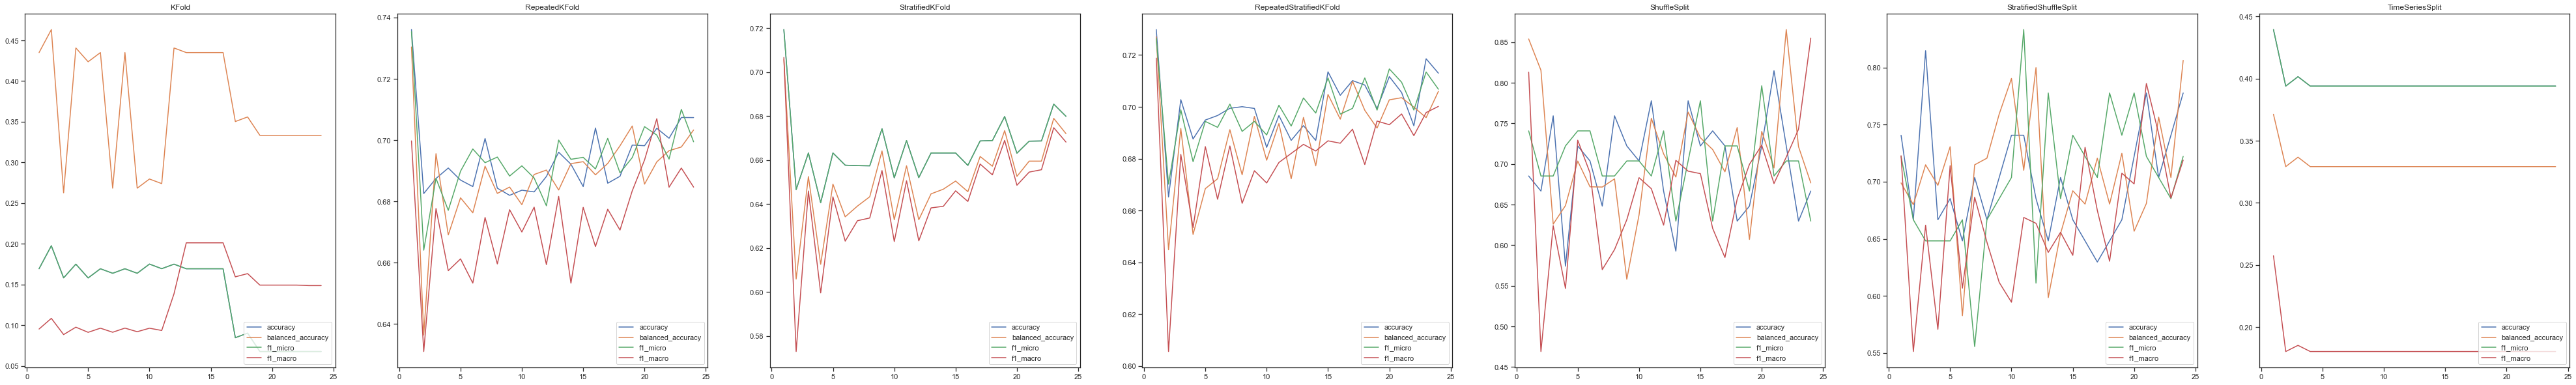

In [73]:
plot_knn_cross_val_score(scores, DEFAULT_FOLDS)